# Plasticity and learning:
## Supervised Error-Correcting rules:

A learning strategy is to start with an initial guess for the weights,
compare the output $v(u^m)$ in response to input $u^m$ with the desired output
$v^m$, and change the weights to improve the performance. Two important
error-correcting modification rules are the perceptron rule, which applies
to binary classification, and the delta rule, which can be applied to 
function approximation and many other problems.

In [3]:
from IPython.display import Image
url = 'fig8_13.png'
Image(url = url, width = 600, height = 800)

## 1. Function approximation:
Populations of neurons (labeled by an index $b = 1, 2,..., N_u$) 
that respond to a stimulus value $s$, by firing
at average rates $f_b (s)$, can similarly represent an entire set of functions.
However, a function $h(s)$ that is not equal to any of the single neuron tuning
curves must be represented by combining the responses of a number
of units.
$$v(s) = \vec{w}\cdot\vec{u} = \vec{w}\cdot\vec{f}(s) = \sum_{b=1}^{N_u} w_b f_b(s)$$

We assume that the basis functions are held overcomplete
fixed, and only the weights are adjusted to improve output performance.


Given $N_s$ sample stimuli, $s^m$ for $m = 1, 2, ..., N_s$ and the corresponding
function values $h(s^m)$, during a training period. To make $v(s^m)$ match $h(s^m)$
for all $m$ we minimize the error:
$$E = \frac{1}{2} \sum_{m=1}^{N_s} \left( h(s^m) - v(s^m) \right)^2 = \frac{N_s}{2}<\left( h(s) - \vec{w}\cdot\vec{f}(s))
\right)^2>$$

## 2. The delta rule:

The delta rule (design for continuous rather than discrete output values)
provides a simple but extremely useful version of this is the gradient descent
procedure, which modifies $w$ according to
$$w_b \rightarrow w_b + \epsilon_w \frac{\partial E}{\partial w_b}$$
We assume that $\epsilon_w$ is small enough so that $E$ decreases at
least until $w$ is very close to a minimum.

Using the $E$ shown before
$$\vec{\nabla}_w E = - \sum_{m=1}^{N_s} \left( h(s^m) - v(s^m) \right) \vec{f}(s^m)$$
The presence of the
sum means that the learning rule of gradient descent cannot be applied until all the sample patterns have been presented, because all of them are needed to compute the amount by which the weight vector should be
changed. It is much more convenient if **updating of the weights takes place
continuously** while sample inputs are presented. This can be done using
**stochastic gradient** descent. This alternative procedure involves presenting randomly chosen input-output pairs $s^m$ and $h(s^m)$, and change $w$ according to
$$\vec{w} \rightarrow \vec{w} + \epsilon_w \cdot \left( h(s^m) - v(s^m) \right) \vec{f}(s^m)$$

In [126]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])
def my_plot(s, vs, tlt):
    # output function
    x = np.linspace(-10, 10, 100)
    h = np.sin(x)
    # plot
    fig, ax = plt.subplots()
    ax.plot(s, vs, 'r.', label = 'Random Weights')
    ax.plot(x, h, 'k-', label = 'Real Output')
    ax.set_xticks([-10, 0, 10])
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax.set_title(tlt)
    plt.show()

### Approximating a sin(x) output function:

In [127]:
np.random.seed(42)
# input tuning curves
Nb = 10
sb = np.arange(-Nb, Nb+2, 2, dtype = 'float')
fb = lambda s: np.exp(-0.5*(s - sb)*(s - sb))
# output of the neuron
def v(w, s, fb):
    return np.array([np.sum(w * fb(i)) for i in s])

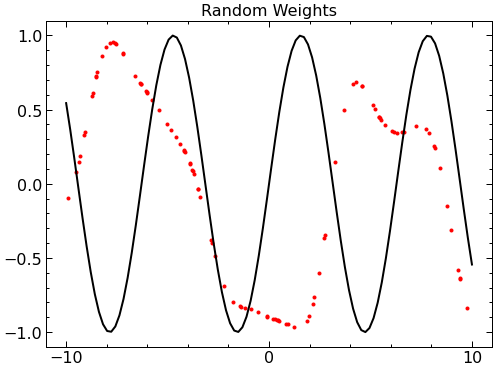

In [128]:
# weights
w = np.random.uniform(-1, 1, Nb+1)
# samples 
Ns = 100
s = np.random.uniform(-10, 10, Ns)
vs = v(w, s, fb)
my_plot(s, vs, 'Random Weights')

### Output after weight modification using the delta rule with 20 samples

In [131]:
def Delta_Rule(s, w, h, fb):
    eps_w = 1.1
    for s_i in s:
        w += eps_w * (h(s_i) - np.sum(w * fb(s_i))) * fb(s_i)
    return w 

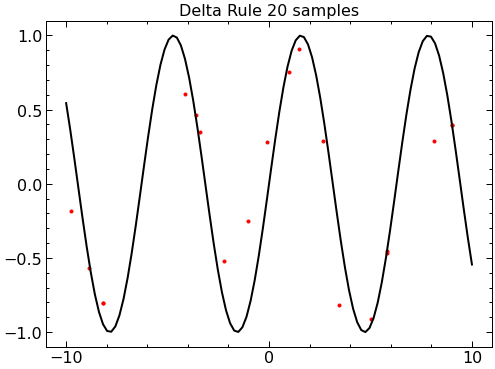

In [135]:
# weights
w = np.random.uniform(-1, 1, Nb+1)
# weight modification
Ns = 20
s = np.random.uniform(-10, 10, Ns)
Delta_Rule(s, w, np.sin, fb)
# output of the neuron
vs = v(w, s, fb)
my_plot(s, vs, 'Delta Rule 20 samples')

### Output after weight modification using the delta rule with 100 samples

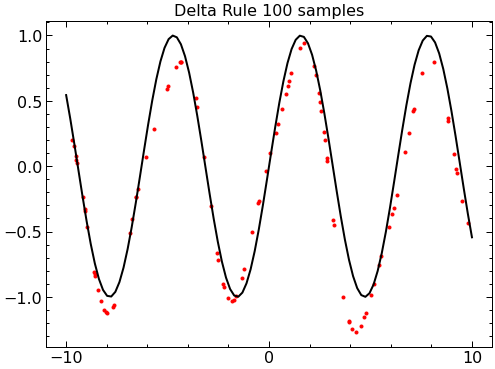

In [134]:
# weights
w = np.random.uniform(-1, 1, Nb+1)
# weight modification
Ns = 100
s = np.random.uniform(-10, 10, Ns)
Delta_Rule(s, w, np.sin, fb)
# output of the neuron
vs = v(w, s, fb)
my_plot(s, vs, 'Delta Rule 100 samples')